## Gaussian mixture models

- A Gaussian mixture model is a probabilistic model that assumes all the data points are generated from a mixture of a finite number of Gaussian distributions with unknown parameters. One can think of mixture models as generalizing k-means clustering to incorporate information about the covariance structure of the data as well as the centers of the latent Gaussians.

https://brilliant.org/wiki/gaussian-mixture-model/

In [99]:
from sklearn.mixture import GaussianMixture

In [100]:
gmm = GaussianMixture(
    n_components=4,
    covariance_type='full',
    tol=0.001,
    reg_covar=1e-06,
    max_iter=100,
    n_init=1,
    init_params='kmeans',
    weights_init=None,
    means_init=None,
    precisions_init=None,
    random_state=None,
    warm_start=False,
    verbose=0,
    verbose_interval=10,)

In [101]:
df = pd.read_csv('customer_segmentation.csv')
X = df.copy()
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)

<IPython.core.display.Javascript object>

In [102]:
gmm.fit(X)

C:\Users\sunny\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.



GaussianMixture(n_components=4)

In [103]:
clusters = pd.DataFrame(X,columns=df.columns)
clusters["label"] = gmm.predict(X)

<IPython.core.display.Javascript object>

In [104]:
import plotly.express as px

fig = px.scatter_3d(clusters,
                    x='n_clicks', 
                    y='amount_spent',
                    z='amount_discount',
                    color='label', width=600, height=600)
fig.update_traces(marker=dict(size=2), selector=dict(mode='markers'))
fig.show()

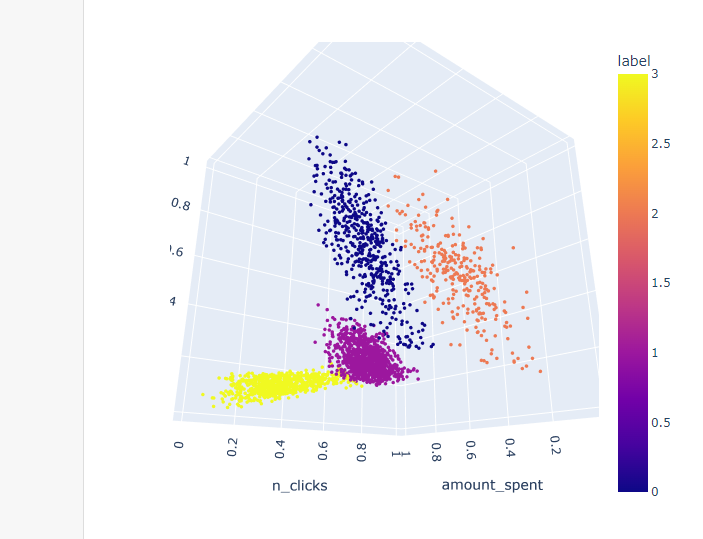

In [105]:
gmm.predict_proba(X).round(2)

array([[0.  , 0.81, 0.18, 0.  ],
       [0.  , 0.99, 0.01, 0.  ],
       [0.  , 0.93, 0.07, 0.  ],
       ...,
       [1.  , 0.  , 0.  , 0.  ],
       [0.98, 0.  , 0.  , 0.02],
       [0.98, 0.  , 0.  , 0.02]])